# Pymaceuticals Inc.
---

### Analysis

- The first observation that I made while going through this data was the correlation between mouse weight and average tumor volume. The correlation between the two .84, which suggests a relatively strong positive correlation. This means that when the mouse weight increases, the average tumor volume does as well.
- The next observation I made was looking at the Mouse l509. As the time increased, the tumor volume seemed to decrease.
- Another observation I made was the focus on Capomulin and Ramicane. These two treatments had the most observations, while the treatment Propriva had the lowest amount of observations. The difference between the treatments observations came out to about 80.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_merge_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mouse_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count_df = mouse_merge_df["Mouse ID"].nunique()
mice_count_df

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_merge_df.loc[mouse_merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_info_df = mouse_merge_df.loc[mouse_merge_df["Mouse ID"] == "g989", :]
duplicate_info_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df =mouse_merge_df.loc[mouse_merge_df["Mouse ID"].isin(duplicate_mouse)==False]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
mice_count_cleaned = cleaned_df["Mouse ID"].nunique()
mice_count_cleaned

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).mean()
median = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).median()
variance = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).var()
std = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).std()
sem = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).sem()

tumor_volume_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err.": sem
})

tumor_volume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"] })
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

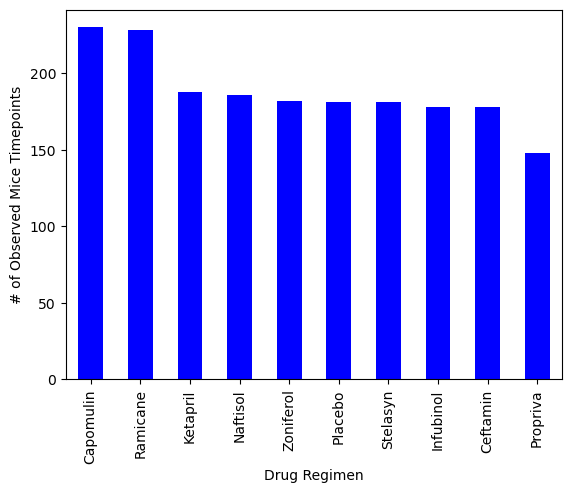

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_0f_mice = cleaned_df["Drug Regimen"].value_counts()
pandas_chart = count_0f_mice.plot.bar(color="b")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mice Timepoints")
plt.show()



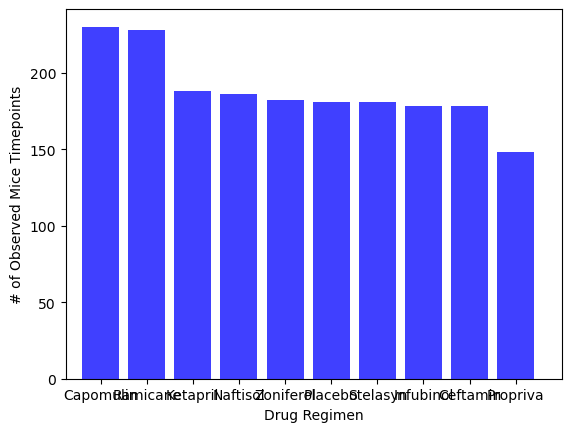

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = count_0f_mice.index.values
y_axis = count_0f_mice.values

plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center")

plt.xlim(-0.75, len(x_axis))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mice Timepoints")
plt.show()

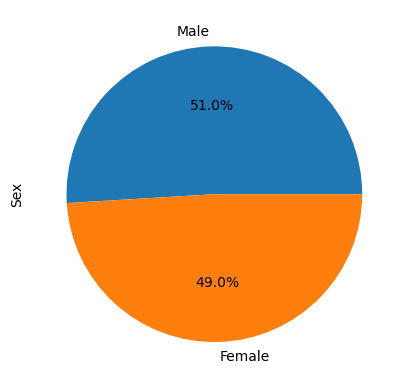

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_plot = cleaned_df["Sex"].value_counts()
gender_plot.plot.pie(autopct = "%1.1f%%")
plt.show()

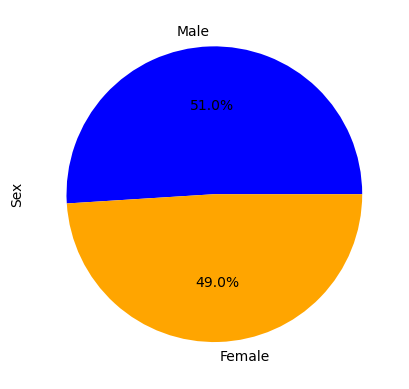

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [51.0, 49.0]
colors = ["blue", "orange"]
explode= (0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volume = cleaned_df.groupby(["Drug Regimen", "Mouse ID"]).last()[["Timepoint", "Tumor Volume (mm3)"]]
last_tumor_vol_df = last_tumor_volume.reset_index()

In [78]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_op = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_op:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    last_tumor_volume = last_tumor_vol_df.loc[last_tumor_vol_df["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data_list.append(last_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = last_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    mean = last_tumor_volume.mean()
    outlier_occupancy = last_tumor_volume.loc[(last_tumor_volume < lower_bound) | (last_tumor_volume > upper_bound)]
    outlier_occupancy
    print(f"{drug} Treatment")
    print(f"The lower quartile of {drug} is {lowerq}")
    print(f"The higher quartile of {drug} is {upperq}")
    print(f"The inter quartile range of {drug} is {iqr}")
    print(f"{round(lower_bound, 2)} could be outliers")
    print(f"{round(upper_bound, 2)} could be outliers")


Capomulin Treatment
The lower quartile of Capomulin is 32.37735684
The higher quartile of Capomulin is 40.1592203
The inter quartile range of Capomulin is 7.781863460000004
20.7 could be outliers
51.83 could be outliers
Ramicane Treatment
The lower quartile of Ramicane is 31.56046955
The higher quartile of Ramicane is 40.65900627
The inter quartile range of Ramicane is 9.098536719999998
17.91 could be outliers
54.31 could be outliers
Infubinol Treatment
The lower quartile of Infubinol is 54.04860769
The higher quartile of Infubinol is 65.52574285
The inter quartile range of Infubinol is 11.477135160000003
36.83 could be outliers
82.74 could be outliers
Ceftamin Treatment
The lower quartile of Ceftamin is 48.72207785
The higher quartile of Ceftamin is 64.29983003
The inter quartile range of Ceftamin is 15.577752179999997
25.36 could be outliers
87.67 could be outliers


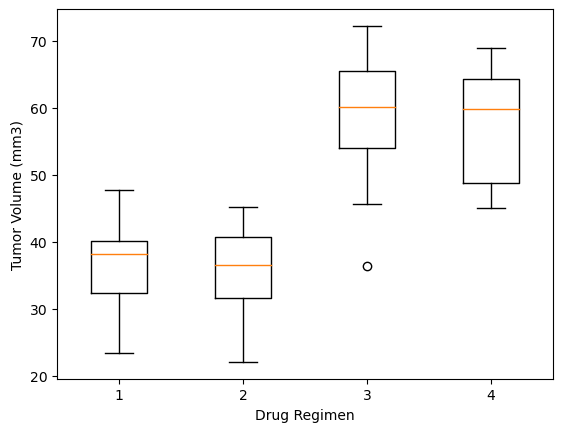

In [89]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, box4_plot = plt.subplots()
box4_plot.boxplot(tumor_vol_data_list)
box4_plot.set_xlabel("Drug Regimen")
box4_plot.set_ylabel("Tumor Volume (mm3)")
plt.show()



## Line and Scatter Plots

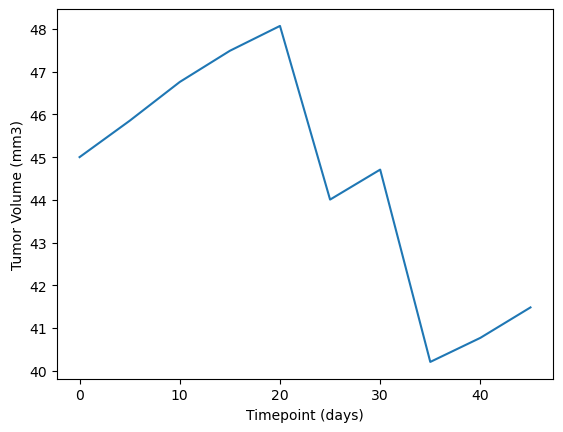

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
line_chart = capomulin_df.loc[capomulin_df["Mouse ID"]== "l509", :]
x_axis = line_chart["Timepoint"]
y_axis = line_chart["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

C:\Users\nickr\AppData\Local\Temp\ipykernel_16816\1654480671.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_obs = capomulin_df.groupby(["Mouse ID"]).mean()


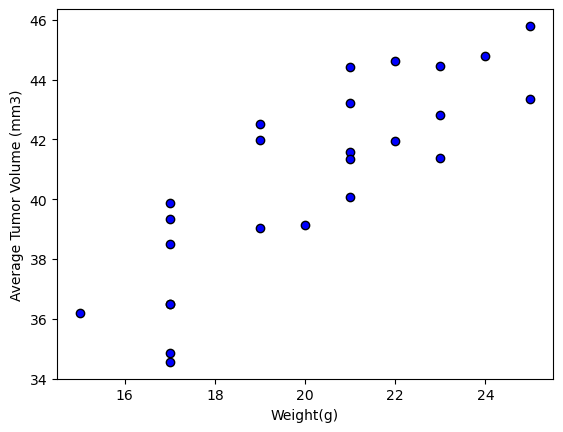

In [57]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_obs = capomulin_df.groupby(["Mouse ID"]).mean()
x_value = avg_obs["Weight (g)"]
y_value = avg_obs["Tumor Volume (mm3)"]


plt.scatter(x_value, y_value, color = "blue", marker= "o", edgecolors="black")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
y =0.95x +21.55


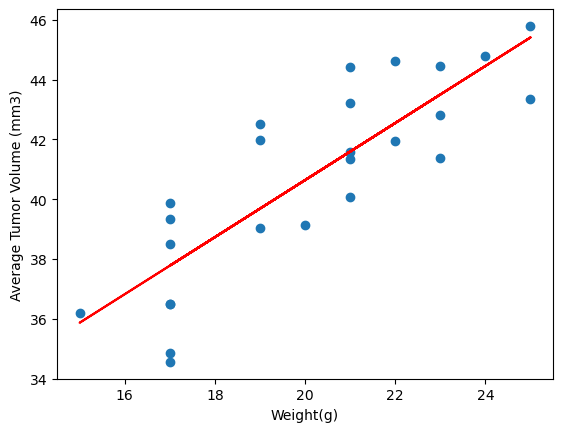

In [66]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_obs["Weight (g)"], avg_obs["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)

regression = x_value *slope +intercept
equation = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(equation)

plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(x_value, y_value)
plt.plot(x_value, regression, "r-")
plt.annotate(equation, (20,5), fontsize=15, color="red")
plt.show()
